In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
# 全部行都能輸出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 刪除警告訊息
import warnings
warnings.filterwarnings('ignore')


In [3]:
train_df = pd.read_csv(r".\Data\input\train.csv")
test_df = pd.read_csv("./Data/input/test.csv")
train_df
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price+1)'}>]], dtype=object)

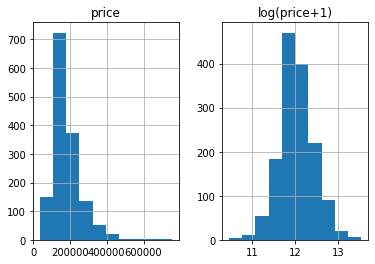

In [4]:
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

<AxesSubplot:>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

<AxesSubplot:>

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519417, 180921.19589041095, 0.9319665641512989))

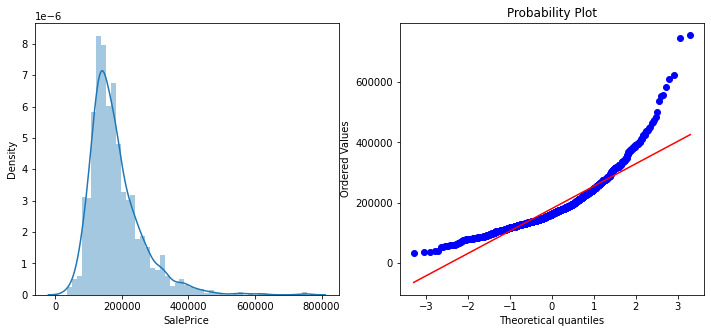

In [5]:
from scipy.linalg import norm
# 調整前
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(train_df["SalePrice"], hist=True)
plt.subplot(122)
stats.probplot(train_df["SalePrice"], plot=plt)
plt.show()

In [6]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


<AxesSubplot:>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

<AxesSubplot:>

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39825964665415103, 12.024057394918403, 0.9953761551826702))

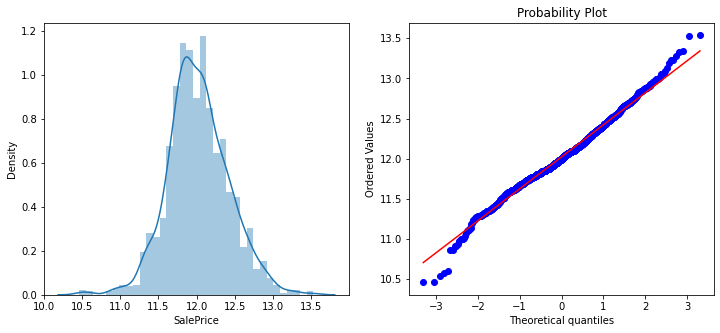

In [7]:
# 調整後
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(train_df["SalePrice"],hist=True)
plt.subplot(122)
stats.probplot(train_df["SalePrice"], plot=plt)
plt.show()

In [8]:
all_df = pd.concat((train_df,test_df), axis=0)
all_df
all_df.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:>

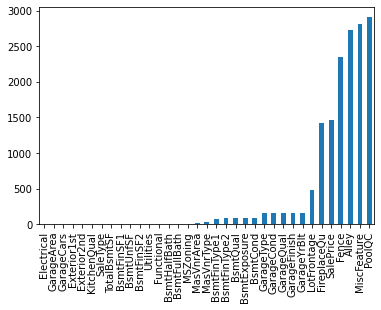

In [9]:
# 查看缺失值
missing = all_df.isnull().sum()
missing = missing[ missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [10]:
# 查看缺失值比例(評估各欄位缺失值)
la = []
for i in all_df.columns:
    lm = all_df[i].isnull().mean()
    if lm > 0.1:
        print(i,":",lm)
        la.append(i)

# 將需要欄位留下
la.remove('LotFrontage')
la.remove('SalePrice')
print(la)

LotFrontage : 0.16649537512846865
Alley : 0.9321685508735869
FireplaceQu : 0.48646796848235696
PoolQC : 0.9965741692360397
Fence : 0.8043850633778691
MiscFeature : 0.9640287769784173
SalePrice : 0.499828708461802
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
# 去除缺失值過大的欄位
all_df.shape
for i in la:
    all_df.drop(columns=i, inplace=True) # 將缺失值過大欄位去除,並覆蓋原有檔案
all_df.shape

(2919, 81)

(2919, 76)

In [12]:
# 將MSSubClass欄位轉成str
all_df["MSSubClass"].dtypes
all_df["MSSubClass"] = all_df["MSSubClass"].astype("object")
all_df["MSSubClass"].dtypes

dtype('int64')

dtype('O')

In [13]:
num_columns = [i for i in all_df.columns if all_df.dtypes[i] != "object"]
# 將需要保留的的欄位,從num_columns的表格移除
num_columns.remove("Id")
num_columns.remove("SalePrice")
nonnum_columns = [i for i in all_df.columns if all_df.dtypes[i] == "object"]

print(num_columns)
print( "num_columns個數:" ,len(num_columns))
print(nonnum_columns)
print( "nonnum_columns個數:" ,len(nonnum_columns))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
num_columns個數: 35
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'P

In [14]:
# 查詢nonnum_columns欄位內是否有空值存在
for i1 in nonnum_columns:
    a1 = all_df[i1].isnull().sum()
    if a1 != 0:
        print(i1,":",a1)

MSZoning : 4
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 24
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinType2 : 80
Electrical : 1
KitchenQual : 1
Functional : 2
GarageType : 157
GarageFinish : 159
GarageQual : 159
GarageCond : 159
SaleType : 1


In [15]:
# nonnum_columns欄位內填進缺失值
for i2 in nonnum_columns:
    if all_df[i2].isnull().sum() != 0:
        all_df[i2] = all_df[i2].fillna(all_df[i2].mode()[0]) # all_df[i2].mode()[0] => 為了避免有多個眾數,所以在這裡多家加0]:取第一個位子的眾數
for i3 in nonnum_columns:
    print(all_df[i3].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [16]:
# nonnum_columns欄位,做LabelEncoding
for i4 in nonnum_columns:
    all_df[i4] = LabelEncoder().fit_transform(all_df[i4])
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247699
1,2,0,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109016
2,3,5,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317171
3,4,6,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849405
4,5,5,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,NaN
1455,2916,13,4,21.0,1894,1,3,3,0,4,...,0,0,0,0,0,4,2006,8,0,NaN
1456,2917,0,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,9,2006,8,0,NaN
1457,2918,9,3,62.0,10441,1,3,3,0,4,...,0,0,0,0,700,7,2006,8,4,NaN


In [17]:
# 查詢num_columns欄位內是否有空值存,並且以均值直接進行填補
for i5 in num_columns:
    a5 = all_df[i5].isnull().sum()
    if a5 != 0:
        print(i5,":",a5)
        all_df[i5] = all_df[i5].fillna(all_df[i5].mean())

LotFrontage : 486
MasVnrArea : 23
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
BsmtFullBath : 2
BsmtHalfBath : 2
GarageYrBlt : 159
GarageCars : 1
GarageArea : 1


In [18]:
# 再次確認num_columns欄位內是否有缺失值
for i6 in num_columns:
    print(all_df[i6].isnull().sum())
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Text(0.5, 1.0, 'LotFrontage')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021e8c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021e8cdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021e8c340>],
 'medians': [<matplotlib.lines.Line2D at 0x23021e99550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021e998e0>],
 'means': []}

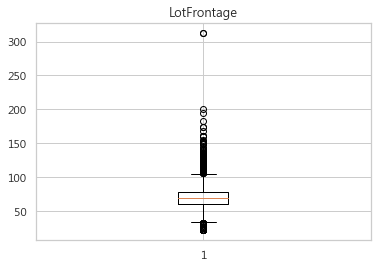

Text(0.5, 1.0, 'LotArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021ee9a30>,
 'caps': [<matplotlib.lines.Line2D at 0x23021ef8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021ee96a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ef88b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ef8c40>],
 'means': []}

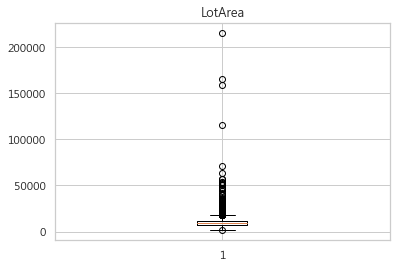

Text(0.5, 1.0, 'OverallQual')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f44c10>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f54370>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f44880>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f54a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f54e20>],
 'means': []}

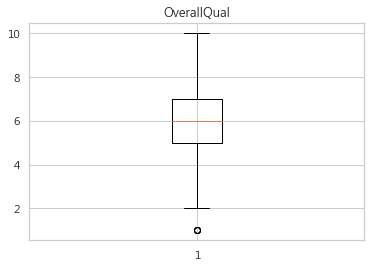

Text(0.5, 1.0, 'OverallCond')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fb50a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021fb57c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021fa1cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fb5ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fbf2b0>],
 'means': []}

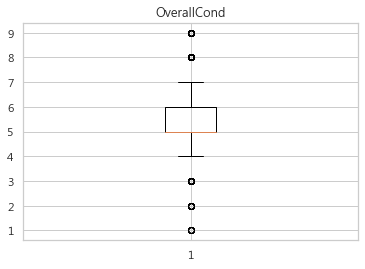

Text(0.5, 1.0, 'YearBuilt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022011af0>,
 'caps': [<matplotlib.lines.Line2D at 0x23022024250>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022011760>],
 'medians': [<matplotlib.lines.Line2D at 0x23022024970>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022024d00>],
 'means': []}

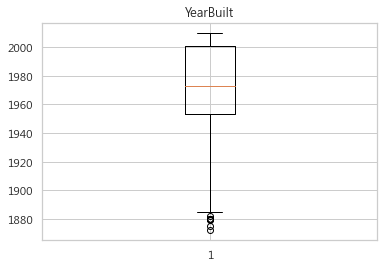

Text(0.5, 1.0, 'YearRemodAdd')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302207b850>,
 'caps': [<matplotlib.lines.Line2D at 0x2302207bf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302207b4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2302208b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302208ba60>],
 'means': []}

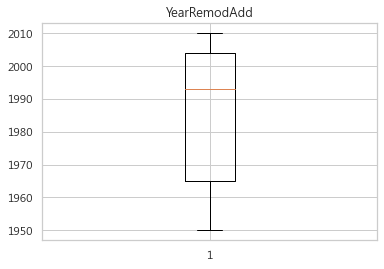

Text(0.5, 1.0, 'MasVnrArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220e4580>,
 'caps': [<matplotlib.lines.Line2D at 0x230220e4ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220e41f0>],
 'medians': [<matplotlib.lines.Line2D at 0x230220f4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220f4790>],
 'means': []}

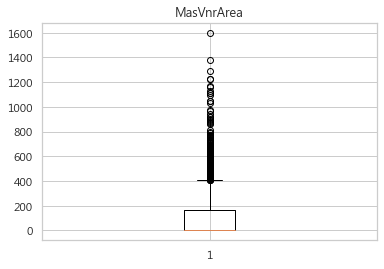

Text(0.5, 1.0, 'BsmtFinSF1')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022148e20>,
 'caps': [<matplotlib.lines.Line2D at 0x23022159580>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022148a90>],
 'medians': [<matplotlib.lines.Line2D at 0x23022159ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022163070>],
 'means': []}

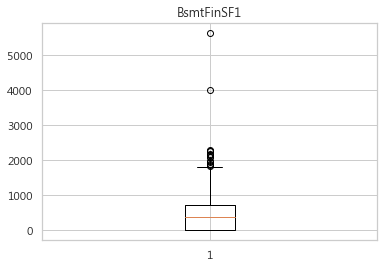

Text(0.5, 1.0, 'BsmtFinSF2')

{'whiskers': [<matplotlib.lines.Line2D at 0x230221b15b0>,
 'caps': [<matplotlib.lines.Line2D at 0x230221b1cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230221b1220>],
 'medians': [<matplotlib.lines.Line2D at 0x23023192430>],
 'fliers': [<matplotlib.lines.Line2D at 0x230231927c0>],
 'means': []}

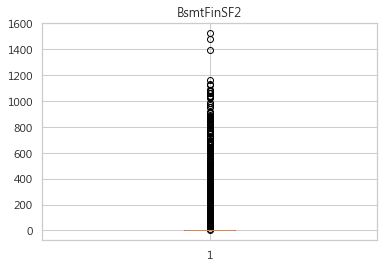

Text(0.5, 1.0, 'BsmtUnfSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230231eaf70>,
 'caps': [<matplotlib.lines.Line2D at 0x230231f9610>,
 'boxes': [<matplotlib.lines.Line2D at 0x230231eabe0>],
 'medians': [<matplotlib.lines.Line2D at 0x230231f9d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023205100>],
 'means': []}

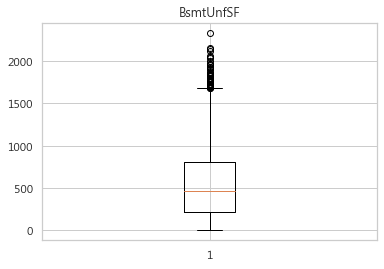

Text(0.5, 1.0, 'TotalBsmtSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022132a00>,
 'caps': [<matplotlib.lines.Line2D at 0x230221326d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022179130>],
 'medians': [<matplotlib.lines.Line2D at 0x23022132280>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022148d90>],
 'means': []}

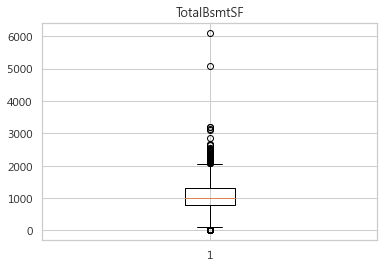

Text(0.5, 1.0, '1stFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302205ae20>,
 'caps': [<matplotlib.lines.Line2D at 0x23022031070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302205a280>],
 'medians': [<matplotlib.lines.Line2D at 0x23022031ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220310a0>],
 'means': []}

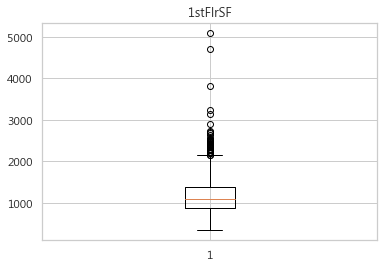

Text(0.5, 1.0, '2ndFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2301fc1d880>,
 'caps': [<matplotlib.lines.Line2D at 0x2301fc1d9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2301fc3ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x2301fc2db80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2301fc2d370>],
 'means': []}

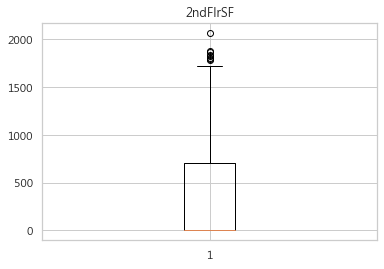

Text(0.5, 1.0, 'LowQualFinSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302208b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302208bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302208b130>],
 'medians': [<matplotlib.lines.Line2D at 0x2302209a340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302209a6d0>],
 'means': []}

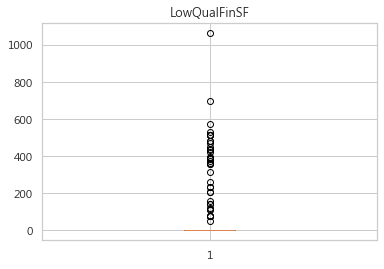

Text(0.5, 1.0, 'GrLivArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021e98bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021ebf310>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021e98820>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ebfa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ebfdc0>],
 'means': []}

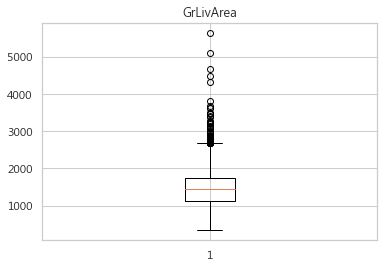

Text(0.5, 1.0, 'BsmtFullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f57d90>,
 'caps': [<matplotlib.lines.Line2D at 0x23021feaa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f57a00>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fea520>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fea040>],
 'means': []}

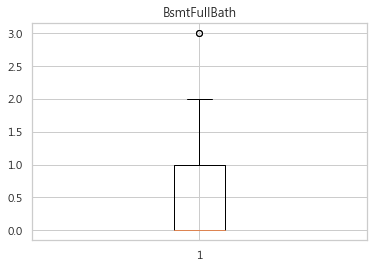

Text(0.5, 1.0, 'BsmtHalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302205db80>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f232e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302205d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f23a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f23d90>],
 'means': []}

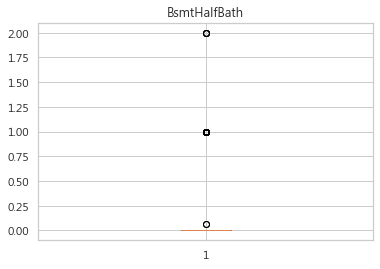

Text(0.5, 1.0, 'FullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f85460>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f85b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f850d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f8b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f8b670>],
 'means': []}

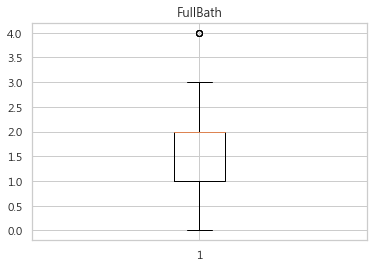

Text(0.5, 1.0, 'HalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021edfd00>,
 'caps': [<matplotlib.lines.Line2D at 0x23021ec5460>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021edf970>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ec5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ec5f10>],
 'means': []}

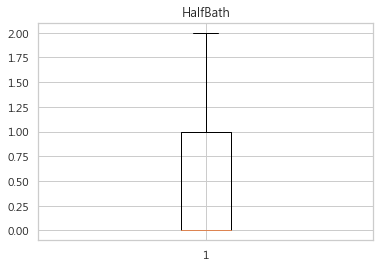

Text(0.5, 1.0, 'BedroomAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232b0580>,
 'caps': [<matplotlib.lines.Line2D at 0x230232b0ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232b01f0>],
 'medians': [<matplotlib.lines.Line2D at 0x230232be400>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232be790>],
 'means': []}

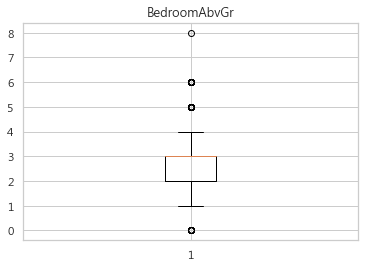

Text(0.5, 1.0, 'KitchenAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023313ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302331f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023313b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2302331fd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302332f130>],
 'means': []}

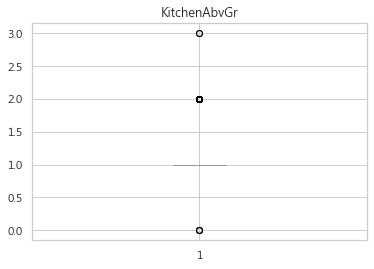

Text(0.5, 1.0, 'TotRmsAbvGrd')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302337bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2302338c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302337b7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2302338c9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302338cd60>],
 'means': []}

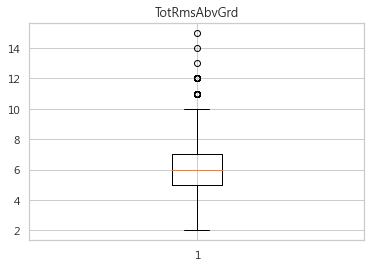

Text(0.5, 1.0, 'Fireplaces')

{'whiskers': [<matplotlib.lines.Line2D at 0x230233e6970>,
 'caps': [<matplotlib.lines.Line2D at 0x230233f40d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230233e65e0>],
 'medians': [<matplotlib.lines.Line2D at 0x230233f47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230233f4b80>],
 'means': []}

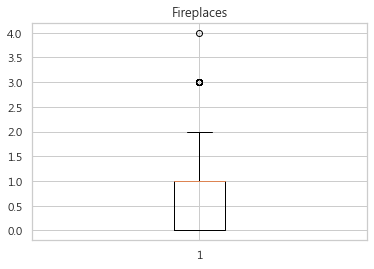

Text(0.5, 1.0, 'GarageYrBlt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023455370>,
 'caps': [<matplotlib.lines.Line2D at 0x23023455a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023448fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x230234651f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234655b0>],
 'means': []}

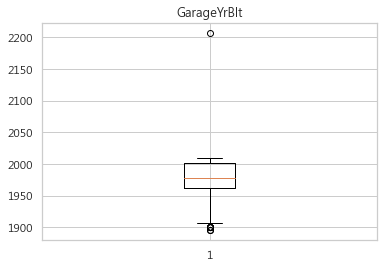

Text(0.5, 1.0, 'GarageCars')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302336da90>,
 'caps': [<matplotlib.lines.Line2D at 0x23023363b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302336d430>],
 'medians': [<matplotlib.lines.Line2D at 0x23023363e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023363ee0>],
 'means': []}

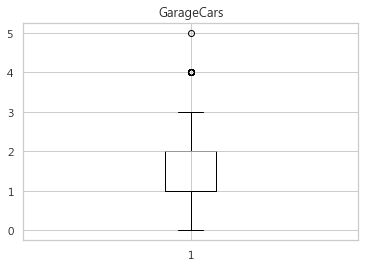

Text(0.5, 1.0, 'GarageArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232bed90>,
 'caps': [<matplotlib.lines.Line2D at 0x230232be760>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232de430>],
 'medians': [<matplotlib.lines.Line2D at 0x230232e4e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232e4940>],
 'means': []}

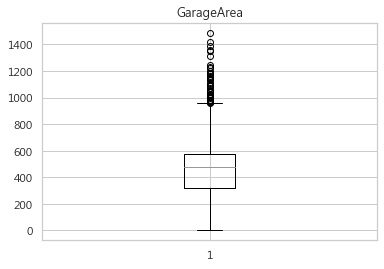

Text(0.5, 1.0, 'WoodDeckSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021e3f9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021e3f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021e3f070>],
 'medians': [<matplotlib.lines.Line2D at 0x2301fc306d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2301fc301c0>],
 'means': []}

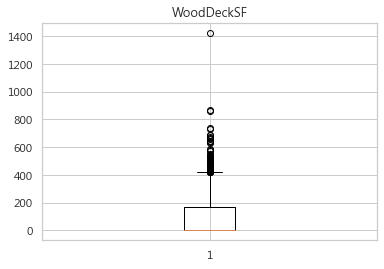

Text(0.5, 1.0, 'OpenPorchSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230221489d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021cea850>,
 'boxes': [<matplotlib.lines.Line2D at 0x230221488e0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fe0730>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fe0910>],
 'means': []}

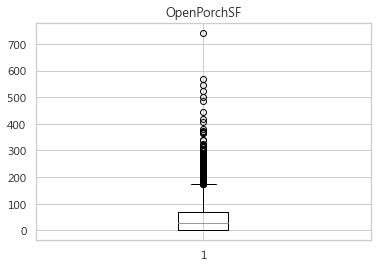

Text(0.5, 1.0, 'EnclosedPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021eae280>,
 'caps': [<matplotlib.lines.Line2D at 0x23021eae9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021e86eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x230232876d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232873d0>],
 'means': []}

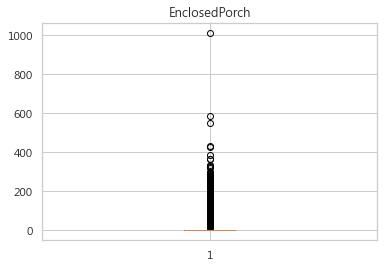

Text(0.5, 1.0, '3SsnPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232cf6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x230232900a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232cfa00>],
 'medians': [<matplotlib.lines.Line2D at 0x230232907c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023290b50>],
 'means': []}

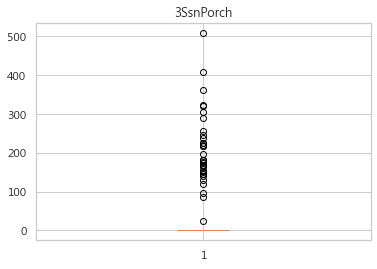

Text(0.5, 1.0, 'ScreenPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302212a1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302212a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022136df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23022133040>],
 'fliers': [<matplotlib.lines.Line2D at 0x230221333d0>],
 'means': []}

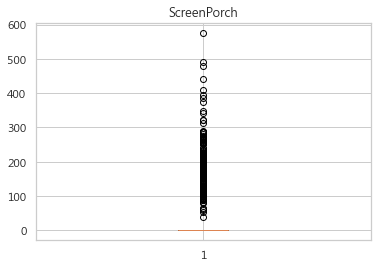

Text(0.5, 1.0, 'PoolArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022039e20>,
 'caps': [<matplotlib.lines.Line2D at 0x2302201e580>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022039a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2302201eca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022005070>],
 'means': []}

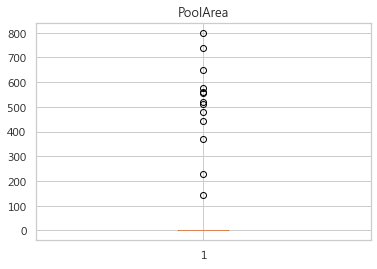

Text(0.5, 1.0, 'MiscVal')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f496d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f49df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f49340>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f44550>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f448e0>],
 'means': []}

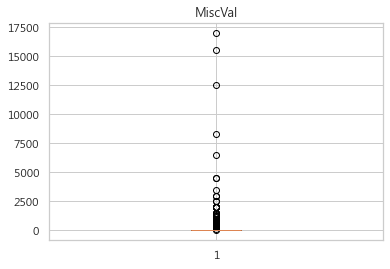

Text(0.5, 1.0, 'MoSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fea9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23022050100>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021feab80>],
 'medians': [<matplotlib.lines.Line2D at 0x23022050820>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022050bb0>],
 'means': []}

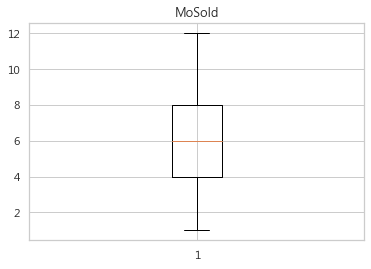

Text(0.5, 1.0, 'YrSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f3f130>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f3f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f2cd60>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f3ff70>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220ea340>],
 'means': []}

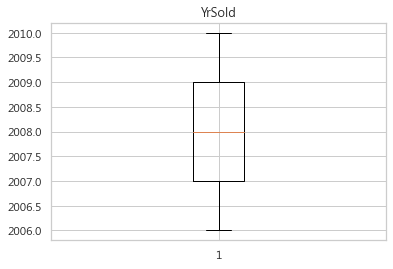

In [19]:
# 離群值確認
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

######### 以下指令在設定中文顯示 ##########
prop = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')
sns.set(font=prop.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
######### 以上指令在設定中文顯示 ##########

for i,f in enumerate(num_columns):
    ori_series = all_df[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    #ori_series[ori_series>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
    #ori_series[ori_series<(qt1 - 1.5*iqr)] = qt1 - 1.5*iqr
    #--------------------------------------------------------#
    plt.title(f) 
    plt.boxplot(ori_series)
    plt.show()

Text(0.5, 1.0, 'LotFrontage')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220a0850>,
 'caps': [<matplotlib.lines.Line2D at 0x230220a0f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220a04c0>],
 'medians': [<matplotlib.lines.Line2D at 0x230220bb6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220bba60>],
 'means': []}

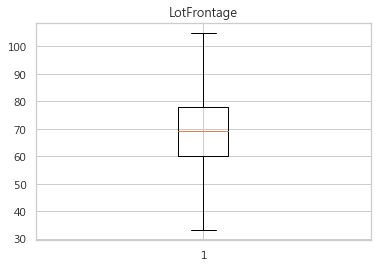

Text(0.5, 1.0, 'LotArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x230234abbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x230234bc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x230234ab820>],
 'medians': [<matplotlib.lines.Line2D at 0x230234bca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234bcdc0>],
 'means': []}

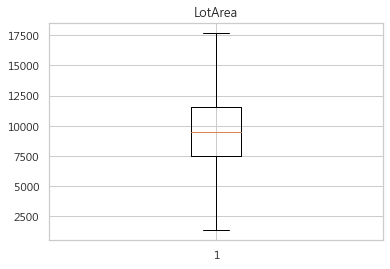

Text(0.5, 1.0, 'OverallQual')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232189a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302322d100>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023218610>],
 'medians': [<matplotlib.lines.Line2D at 0x2302322d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302322dbb0>],
 'means': []}

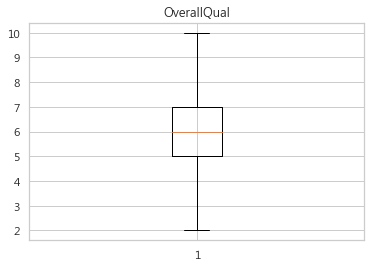

Text(0.5, 1.0, 'OverallCond')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220bcf40>,
 'caps': [<matplotlib.lines.Line2D at 0x230220bc760>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f28ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x23022084610>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022084520>],
 'means': []}

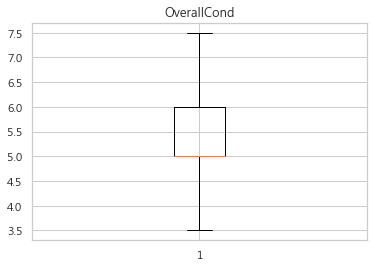

Text(0.5, 1.0, 'YearBuilt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fcb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021fcbee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021fcb520>],
 'medians': [<matplotlib.lines.Line2D at 0x23021feae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fea9d0>],
 'means': []}

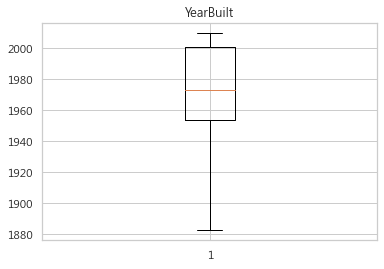

Text(0.5, 1.0, 'YearRemodAdd')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021ef1220>,
 'caps': [<matplotlib.lines.Line2D at 0x23021ec0220>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021ef1190>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ec0af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ec0520>],
 'means': []}

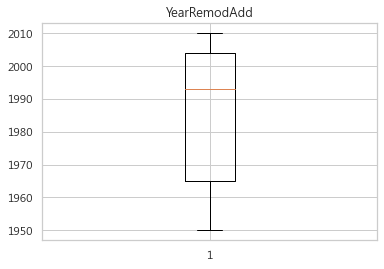

Text(0.5, 1.0, 'MasVnrArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022121b50>,
 'caps': [<matplotlib.lines.Line2D at 0x230221213a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021fe06a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23022132250>],
 'fliers': [<matplotlib.lines.Line2D at 0x230221325b0>],
 'means': []}

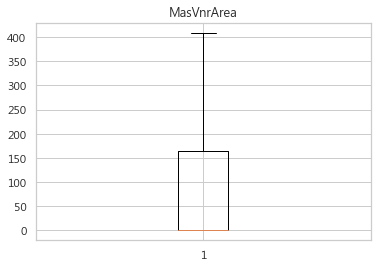

Text(0.5, 1.0, 'BsmtFinSF1')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021eb8d90>,
 'caps': [<matplotlib.lines.Line2D at 0x23021eb80d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021eb8df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021e3fbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021e3fcd0>],
 'means': []}

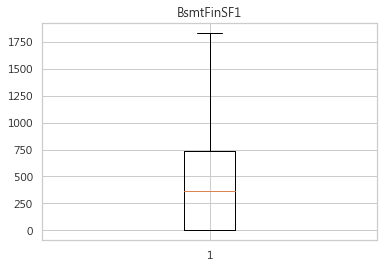

Text(0.5, 1.0, 'BsmtFinSF2')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fac4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x230232e48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021facfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x230232e49d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232e4c70>],
 'means': []}

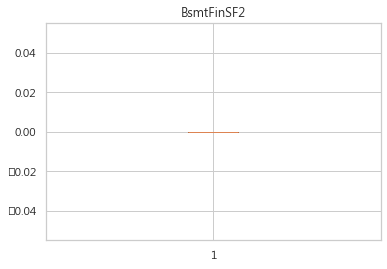

Text(0.5, 1.0, 'BsmtUnfSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302201bb20>,
 'caps': [<matplotlib.lines.Line2D at 0x23022107280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302201b790>],
 'medians': [<matplotlib.lines.Line2D at 0x230221079a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022107d30>],
 'means': []}

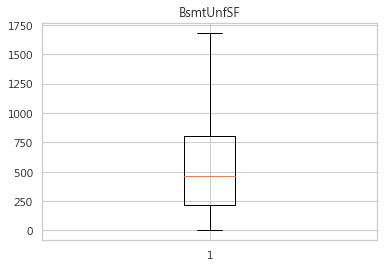

Text(0.5, 1.0, 'TotalBsmtSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f90e50>,
 'caps': [<matplotlib.lines.Line2D at 0x23021ef25b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f90ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ef2cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021edbee0>],
 'means': []}

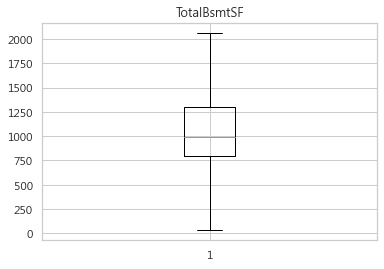

Text(0.5, 1.0, '1stFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232cf700>,
 'caps': [<matplotlib.lines.Line2D at 0x230232cfe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232cf370>],
 'medians': [<matplotlib.lines.Line2D at 0x230232b0580>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232b0910>],
 'means': []}

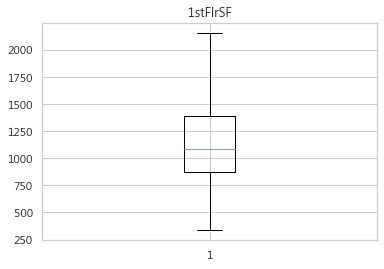

Text(0.5, 1.0, '2ndFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232e79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x230232f2130>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232e7640>],
 'medians': [<matplotlib.lines.Line2D at 0x230232f2850>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232f2be0>],
 'means': []}

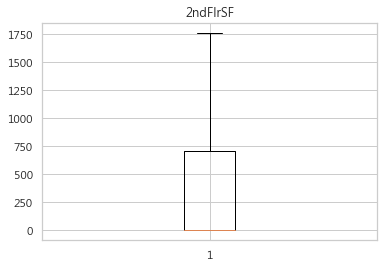

Text(0.5, 1.0, 'LowQualFinSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023481ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x23023426400>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023481910>],
 'medians': [<matplotlib.lines.Line2D at 0x23023426b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023426eb0>],
 'means': []}

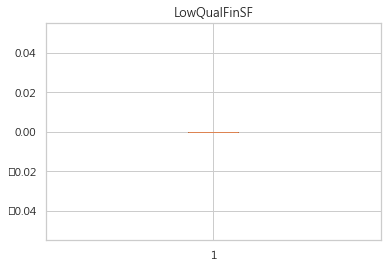

Text(0.5, 1.0, 'GrLivArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302334ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x2302331d4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302334aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x2302331dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302331dfa0>],
 'means': []}

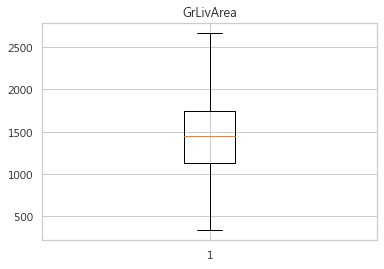

Text(0.5, 1.0, 'BsmtFullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x230233a5e20>,
 'caps': [<matplotlib.lines.Line2D at 0x230233a5d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x230233b6d00>],
 'medians': [<matplotlib.lines.Line2D at 0x230233a50a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230233a72e0>],
 'means': []}

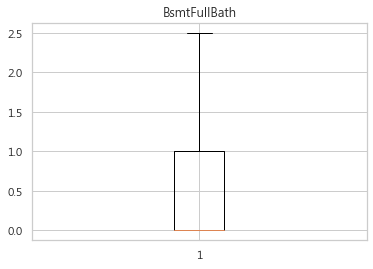

Text(0.5, 1.0, 'BsmtHalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x230233d0790>,
 'caps': [<matplotlib.lines.Line2D at 0x230233d0eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230233d0400>],
 'medians': [<matplotlib.lines.Line2D at 0x230234db610>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234db9a0>],
 'means': []}

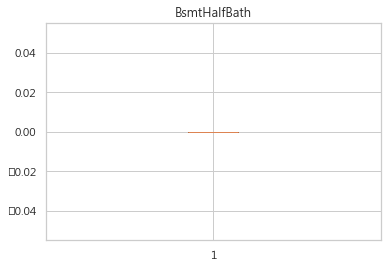

Text(0.5, 1.0, 'FullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302335e8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23023312b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302335ebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x23023312520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302334a7f0>],
 'means': []}

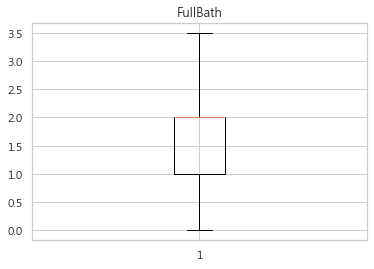

Text(0.5, 1.0, 'HalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232e7c10>,
 'caps': [<matplotlib.lines.Line2D at 0x230232c5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232e7a30>],
 'medians': [<matplotlib.lines.Line2D at 0x230232c5e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ec12b0>],
 'means': []}

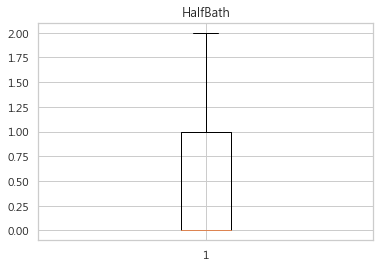

Text(0.5, 1.0, 'BedroomAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fac670>,
 'caps': [<matplotlib.lines.Line2D at 0x230232591f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021facc10>],
 'medians': [<matplotlib.lines.Line2D at 0x23023259430>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023259070>],
 'means': []}

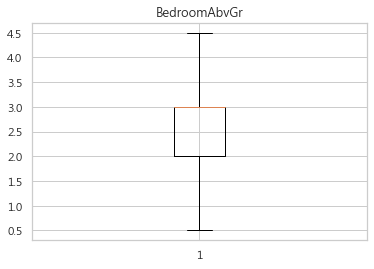

Text(0.5, 1.0, 'KitchenAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x2301fc3b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021e2b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220caee0>],
 'medians': [<matplotlib.lines.Line2D at 0x23022148f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022148ac0>],
 'means': []}

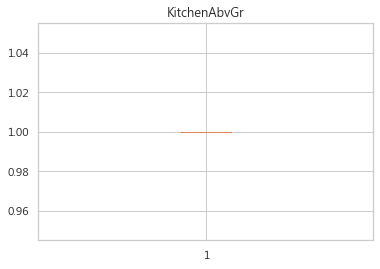

Text(0.5, 1.0, 'TotRmsAbvGrd')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232bfdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23022005250>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232bfa30>],
 'medians': [<matplotlib.lines.Line2D at 0x23022005d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022005970>],
 'means': []}

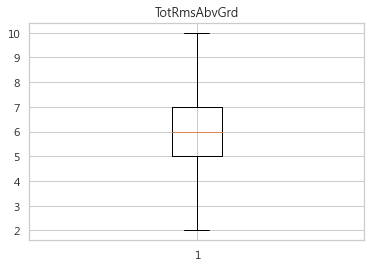

Text(0.5, 1.0, 'Fireplaces')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021fd4d90>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f44af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021fd4ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f44370>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f44b50>],
 'means': []}

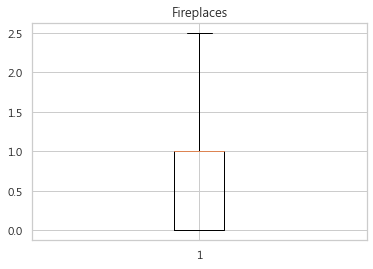

Text(0.5, 1.0, 'GarageYrBlt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f42910>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f42190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f42670>],
 'medians': [<matplotlib.lines.Line2D at 0x230220d4640>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220d41f0>],
 'means': []}

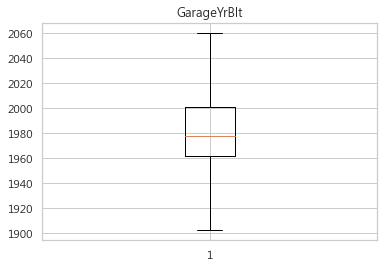

Text(0.5, 1.0, 'GarageCars')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021eab970>,
 'caps': [<matplotlib.lines.Line2D at 0x23023257e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021eabac0>],
 'medians': [<matplotlib.lines.Line2D at 0x23023257c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fd5400>],
 'means': []}

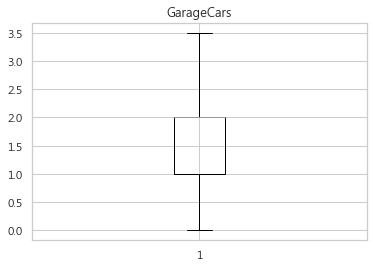

Text(0.5, 1.0, 'GarageArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302348a250>,
 'caps': [<matplotlib.lines.Line2D at 0x2302348aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023476e80>],
 'medians': [<matplotlib.lines.Line2D at 0x2302347d1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302347d550>],
 'means': []}

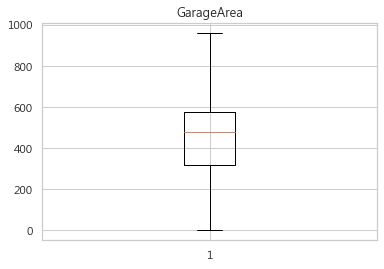

Text(0.5, 1.0, 'WoodDeckSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302200e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302327e130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302200e700>],
 'medians': [<matplotlib.lines.Line2D at 0x2302327e850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302327ebe0>],
 'means': []}

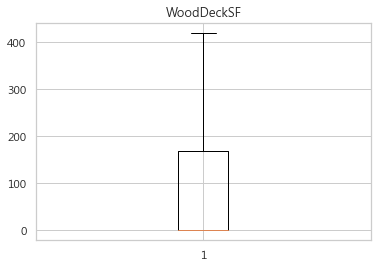

Text(0.5, 1.0, 'OpenPorchSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302329eb20>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f9c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302329e790>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f9c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021f9cd30>],
 'means': []}

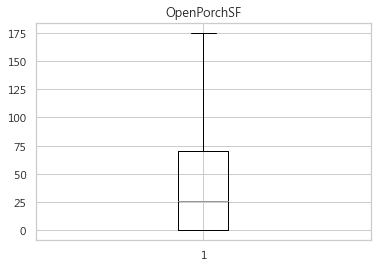

Text(0.5, 1.0, 'EnclosedPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220bdf10>,
 'caps': [<matplotlib.lines.Line2D at 0x23023222670>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220bdb80>],
 'medians': [<matplotlib.lines.Line2D at 0x23023222d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302324c130>],
 'means': []}

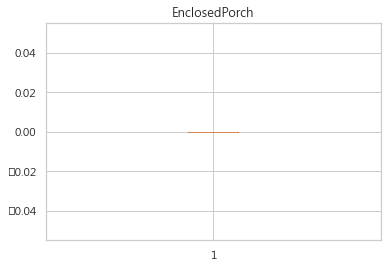

Text(0.5, 1.0, '3SsnPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302319bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x230231b2640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302319bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x230231b2d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x230231f8130>],
 'means': []}

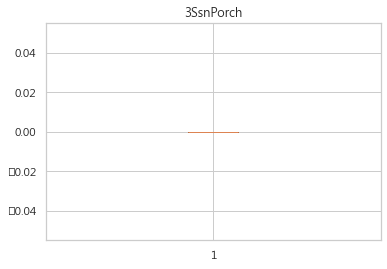

Text(0.5, 1.0, 'ScreenPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022199220>,
 'caps': [<matplotlib.lines.Line2D at 0x23022199910>,
 'boxes': [<matplotlib.lines.Line2D at 0x230221bfdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2302218c070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302218c400>],
 'means': []}

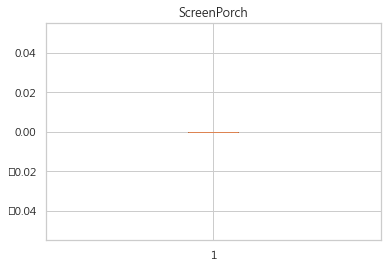

Text(0.5, 1.0, 'PoolArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220bdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f99970>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220bd280>],
 'medians': [<matplotlib.lines.Line2D at 0x23021f99130>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fa63d0>],
 'means': []}

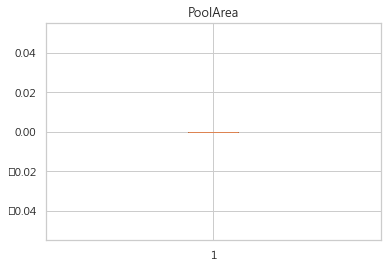

Text(0.5, 1.0, 'MiscVal')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302200edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021eaf190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302200e550>],
 'medians': [<matplotlib.lines.Line2D at 0x23021eaff70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302347ddf0>],
 'means': []}

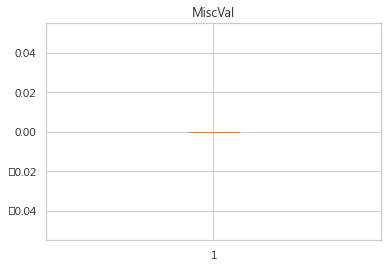

Text(0.5, 1.0, 'MoSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x230231efe50>,
 'caps': [<matplotlib.lines.Line2D at 0x230231efbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022041580>],
 'medians': [<matplotlib.lines.Line2D at 0x230220ea7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fdaf40>],
 'means': []}

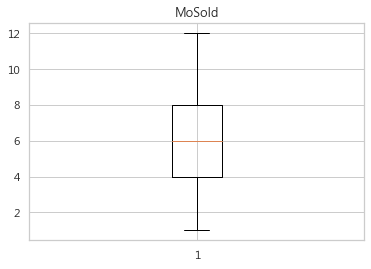

Text(0.5, 1.0, 'YrSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302214bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302214b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021fe9640>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ef1220>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ef1dc0>],
 'means': []}

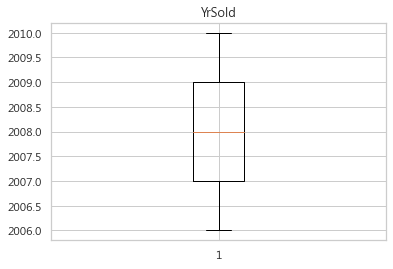

In [20]:
# 離群值填補!!(針對離群值填補其上下限離群值)

for i,f in enumerate(num_columns):
    ori_series = all_df[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    ori_series[ori_series>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
    ori_series[ori_series<(qt1 - 1.5*iqr)] = qt1 - 1.5*iqr
    #--------------------------------------------------------#
    plt.title(f) 
    plt.boxplot(ori_series)
    plt.show()

Text(0.5, 1.0, 'LotFrontage')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022005be0>,
 'caps': [<matplotlib.lines.Line2D at 0x230232123d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022005d00>],
 'medians': [<matplotlib.lines.Line2D at 0x23023212580>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023212d90>],
 'means': []}

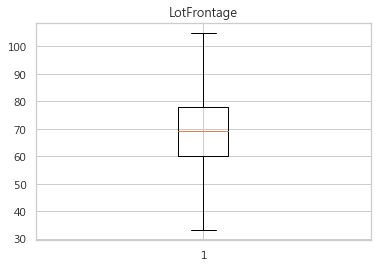

Text(0.5, 1.0, 'LotArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021dcde20>,
 'caps': [<matplotlib.lines.Line2D at 0x23022148dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2301fc3b490>],
 'medians': [<matplotlib.lines.Line2D at 0x230221489a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021eb84f0>],
 'means': []}

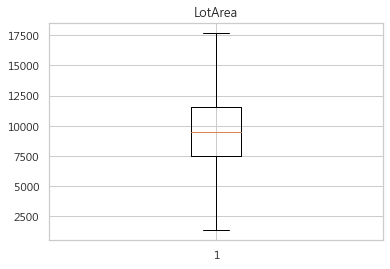

Text(0.5, 1.0, 'OverallQual')

{'whiskers': [<matplotlib.lines.Line2D at 0x230234654f0>,
 'caps': [<matplotlib.lines.Line2D at 0x23021e3f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023465040>],
 'medians': [<matplotlib.lines.Line2D at 0x23021e3ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021e3f1f0>],
 'means': []}

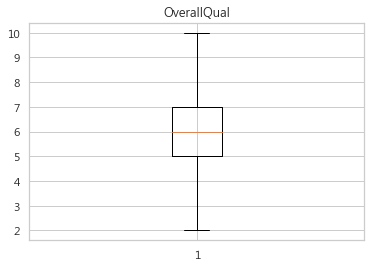

Text(0.5, 1.0, 'OverallCond')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302333ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x2302333cac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302333c430>],
 'medians': [<matplotlib.lines.Line2D at 0x2302341cca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302341c3a0>],
 'means': []}

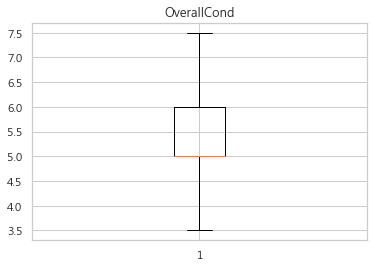

Text(0.5, 1.0, 'YearBuilt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023417370>,
 'caps': [<matplotlib.lines.Line2D at 0x23023417a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023417190>],
 'medians': [<matplotlib.lines.Line2D at 0x230232d0f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232d0700>],
 'means': []}

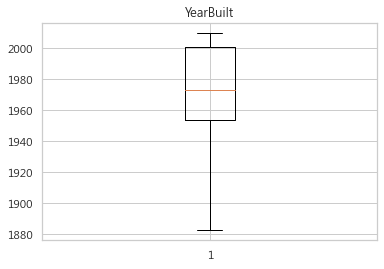

Text(0.5, 1.0, 'YearRemodAdd')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021eda730>,
 'caps': [<matplotlib.lines.Line2D at 0x23021edae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021eda3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ef25b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ef2940>],
 'means': []}

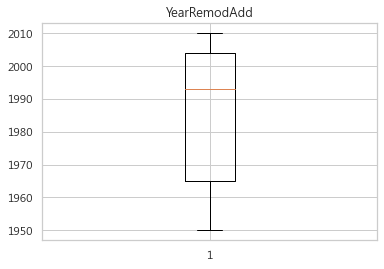

Text(0.5, 1.0, 'MasVnrArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302330f460>,
 'caps': [<matplotlib.lines.Line2D at 0x2302330fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302330f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x230233012e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023301670>],
 'means': []}

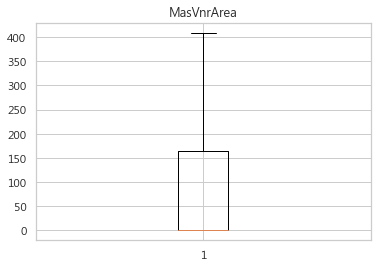

Text(0.5, 1.0, 'BsmtFinSF1')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023432cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23023335430>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023432940>],
 'medians': [<matplotlib.lines.Line2D at 0x23023335b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023335ee0>],
 'means': []}

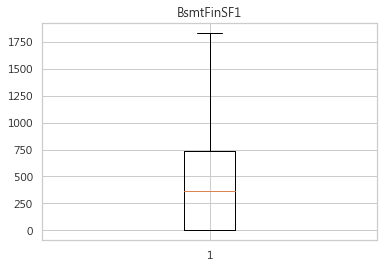

Text(0.5, 1.0, 'BsmtFinSF2')

{'whiskers': [<matplotlib.lines.Line2D at 0x230233def10>,
 'caps': [<matplotlib.lines.Line2D at 0x23023406670>,
 'boxes': [<matplotlib.lines.Line2D at 0x230233deb80>],
 'medians': [<matplotlib.lines.Line2D at 0x23023406d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234e8160>],
 'means': []}

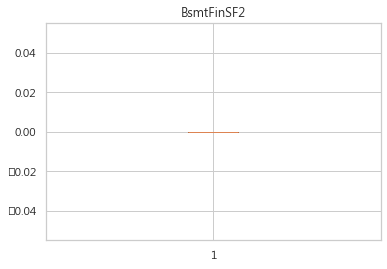

Text(0.5, 1.0, 'BsmtUnfSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302338c100>,
 'caps': [<matplotlib.lines.Line2D at 0x2302338c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302337ed30>],
 'medians': [<matplotlib.lines.Line2D at 0x2302338cf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023362310>],
 'means': []}

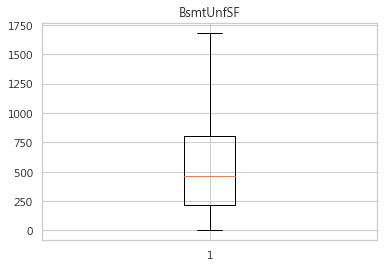

Text(0.5, 1.0, 'TotalBsmtSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302341d100>,
 'caps': [<matplotlib.lines.Line2D at 0x23023449790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302341df40>],
 'medians': [<matplotlib.lines.Line2D at 0x23023449f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023449c40>],
 'means': []}

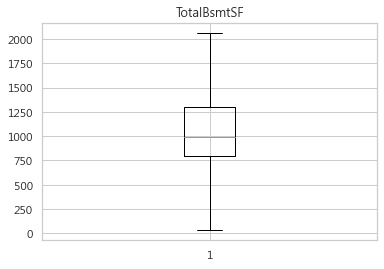

Text(0.5, 1.0, '1stFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302203fcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302203fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302203fe20>],
 'medians': [<matplotlib.lines.Line2D at 0x23023417d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23023417640>],
 'means': []}

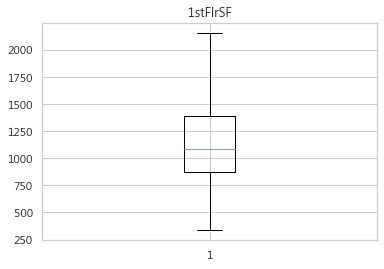

Text(0.5, 1.0, '2ndFlrSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302341c760>,
 'caps': [<matplotlib.lines.Line2D at 0x2302341c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232fbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2302341cbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302333c490>],
 'means': []}

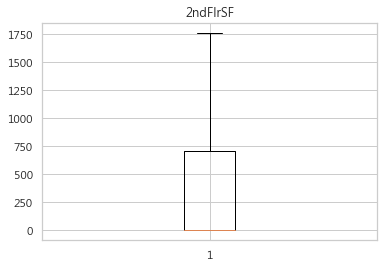

Text(0.5, 1.0, 'LowQualFinSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023259d00>,
 'caps': [<matplotlib.lines.Line2D at 0x23023259a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232bed90>],
 'medians': [<matplotlib.lines.Line2D at 0x230232594f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302205aaf0>],
 'means': []}

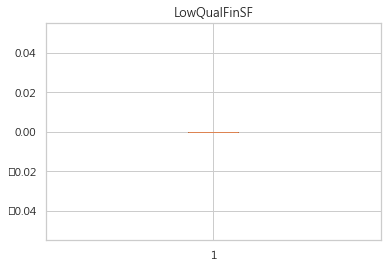

Text(0.5, 1.0, 'GrLivArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022148f40>,
 'caps': [<matplotlib.lines.Line2D at 0x23022148940>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022148b80>],
 'medians': [<matplotlib.lines.Line2D at 0x23021eb8bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021eb8dc0>],
 'means': []}

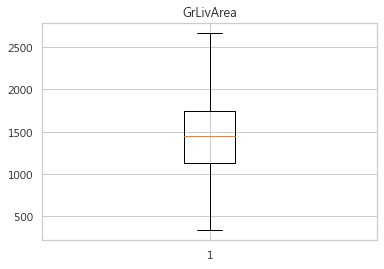

Text(0.5, 1.0, 'BsmtFullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x2301fc2dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2301fc2d3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232127f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fcb430>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220314c0>],
 'means': []}

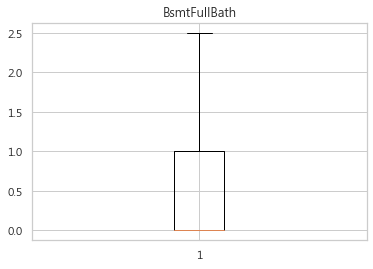

Text(0.5, 1.0, 'BsmtHalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x230220f0550>,
 'caps': [<matplotlib.lines.Line2D at 0x230231efbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230220ea9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x230231ef8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230220eb850>],
 'means': []}

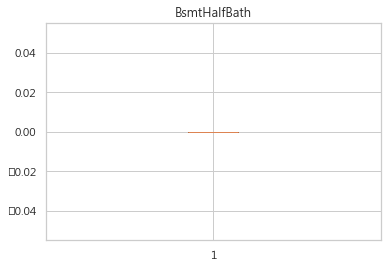

Text(0.5, 1.0, 'FullBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302329eb20>,
 'caps': [<matplotlib.lines.Line2D at 0x230234c1370>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302329ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x230234c10d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234c17f0>],
 'means': []}

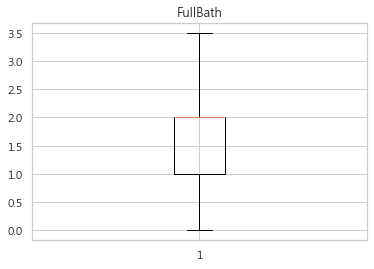

Text(0.5, 1.0, 'HalfBath')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302218c310>,
 'caps': [<matplotlib.lines.Line2D at 0x2302218c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302218ca60>],
 'medians': [<matplotlib.lines.Line2D at 0x230231f8c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x230231f8ac0>],
 'means': []}

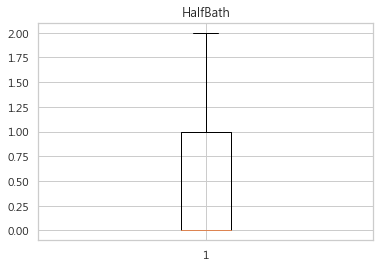

Text(0.5, 1.0, 'BedroomAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302330b5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302330bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302330b220>],
 'medians': [<matplotlib.lines.Line2D at 0x230232ed430>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232ed7c0>],
 'means': []}

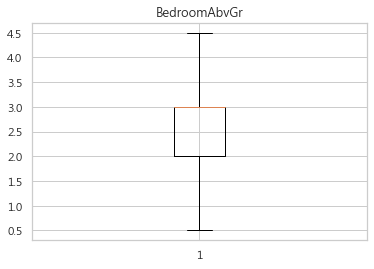

Text(0.5, 1.0, 'KitchenAbvGr')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232aed60>,
 'caps': [<matplotlib.lines.Line2D at 0x230232cc4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230232ae9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x230232ccbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232ccf70>],
 'means': []}

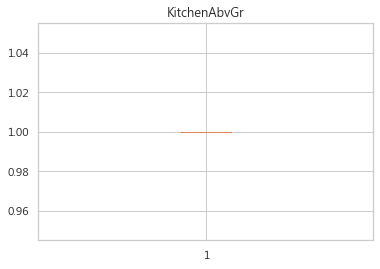

Text(0.5, 1.0, 'TotRmsAbvGrd')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302324afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302208b730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2302324ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x2302208be50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302209d220>],
 'means': []}

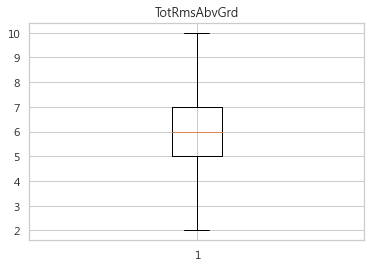

Text(0.5, 1.0, 'Fireplaces')

{'whiskers': [<matplotlib.lines.Line2D at 0x230221b09a0>,
 'caps': [<matplotlib.lines.Line2D at 0x230221b1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x230221b0610>],
 'medians': [<matplotlib.lines.Line2D at 0x230221b1820>],
 'fliers': [<matplotlib.lines.Line2D at 0x230221b1bb0>],
 'means': []}

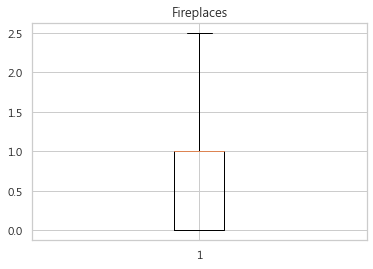

Text(0.5, 1.0, 'GarageYrBlt')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023531130>,
 'caps': [<matplotlib.lines.Line2D at 0x23023531850>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023521d60>],
 'medians': [<matplotlib.lines.Line2D at 0x23023531f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302353c340>],
 'means': []}

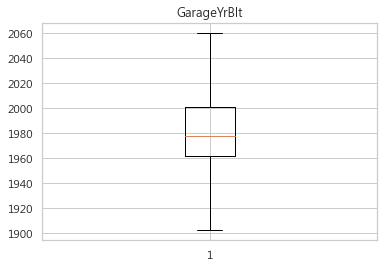

Text(0.5, 1.0, 'GarageCars')

{'whiskers': [<matplotlib.lines.Line2D at 0x230235949a0>,
 'caps': [<matplotlib.lines.Line2D at 0x230235a2100>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023594610>],
 'medians': [<matplotlib.lines.Line2D at 0x230235a2820>],
 'fliers': [<matplotlib.lines.Line2D at 0x230235a2bb0>],
 'means': []}

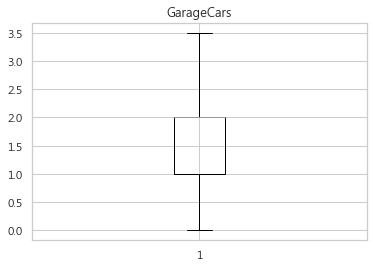

Text(0.5, 1.0, 'GarageArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x230231ce760>,
 'caps': [<matplotlib.lines.Line2D at 0x230231ce940>,
 'boxes': [<matplotlib.lines.Line2D at 0x230231ce9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x230231c9ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230231c94f0>],
 'means': []}

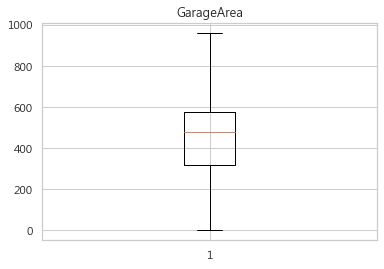

Text(0.5, 1.0, 'WoodDeckSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230231f7c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2302326b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230231f7700>],
 'medians': [<matplotlib.lines.Line2D at 0x230232edd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232edc40>],
 'means': []}

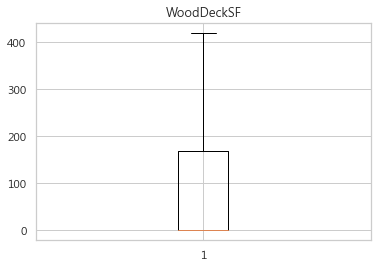

Text(0.5, 1.0, 'OpenPorchSF')

{'whiskers': [<matplotlib.lines.Line2D at 0x230221a7430>,
 'caps': [<matplotlib.lines.Line2D at 0x230221a7130>,
 'boxes': [<matplotlib.lines.Line2D at 0x230221a7b80>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fd4220>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021fd47c0>],
 'means': []}

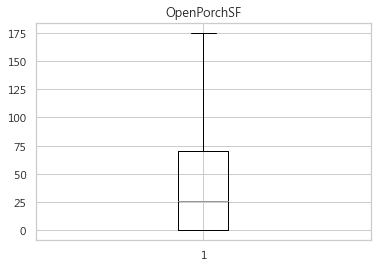

Text(0.5, 1.0, 'EnclosedPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x23021f98c40>,
 'caps': [<matplotlib.lines.Line2D at 0x23021f98100>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021f989d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2302329e9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2302329eaf0>],
 'means': []}

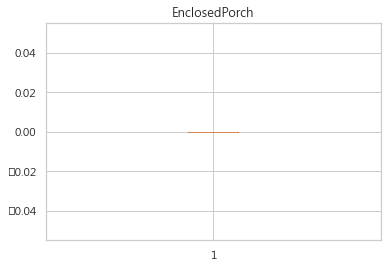

Text(0.5, 1.0, '3SsnPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232576d0>,
 'caps': [<matplotlib.lines.Line2D at 0x230220ea6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023257e20>],
 'medians': [<matplotlib.lines.Line2D at 0x23021fcbbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232bfc70>],
 'means': []}

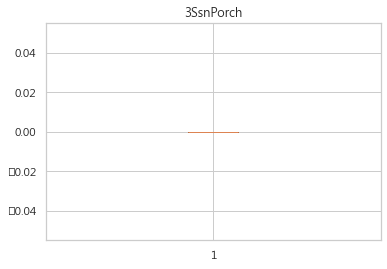

Text(0.5, 1.0, 'ScreenPorch')

{'whiskers': [<matplotlib.lines.Line2D at 0x230232126a0>,
 'caps': [<matplotlib.lines.Line2D at 0x23022034700>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023212f10>],
 'medians': [<matplotlib.lines.Line2D at 0x23022034e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x23022034a00>],
 'means': []}

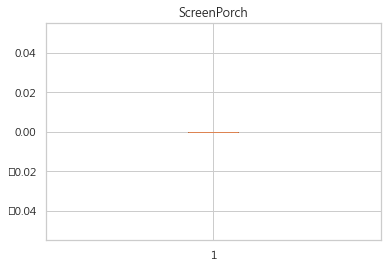

Text(0.5, 1.0, 'PoolArea')

{'whiskers': [<matplotlib.lines.Line2D at 0x23022132250>,
 'caps': [<matplotlib.lines.Line2D at 0x23021dcd070>,
 'boxes': [<matplotlib.lines.Line2D at 0x23022132af0>],
 'medians': [<matplotlib.lines.Line2D at 0x23021ea2a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x23021ea2610>],
 'means': []}

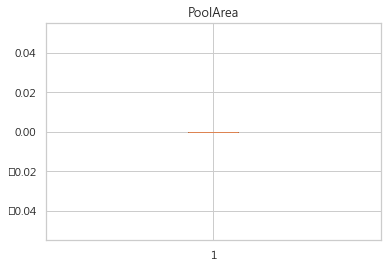

Text(0.5, 1.0, 'MiscVal')

{'whiskers': [<matplotlib.lines.Line2D at 0x2302333c9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2302333c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x23021ec1160>],
 'medians': [<matplotlib.lines.Line2D at 0x230234ecb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x230234ecdc0>],
 'means': []}

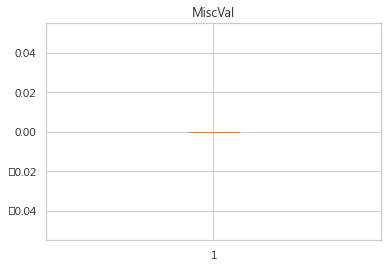

Text(0.5, 1.0, 'MoSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x23023435df0>,
 'caps': [<matplotlib.lines.Line2D at 0x23023435ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23023435550>],
 'medians': [<matplotlib.lines.Line2D at 0x23022121e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x230221213d0>],
 'means': []}

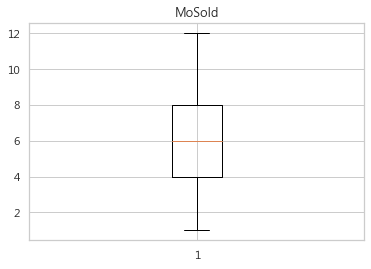

Text(0.5, 1.0, 'YrSold')

{'whiskers': [<matplotlib.lines.Line2D at 0x230231b7c40>,
 'caps': [<matplotlib.lines.Line2D at 0x230231b7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x230231b7e50>],
 'medians': [<matplotlib.lines.Line2D at 0x230232e4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230232e4340>],
 'means': []}

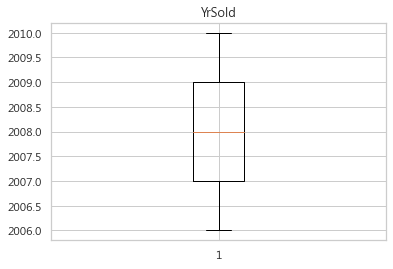

In [21]:
# 再次離群值確認

for i,f in enumerate(num_columns):
    ori_series = all_df[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    #--------------------------------------------------------#
    plt.title(f) 
    plt.boxplot(ori_series)
    plt.show()

In [22]:
# 在確認一次是否還有空值存在(目前因該只有SalePrice存在空值!!!)
for i7 in all_df.columns:
    a7 = all_df[i7].isnull().sum()
    if a7 != 0:
        print(i7,":",a7)

SalePrice : 1459


In [23]:
# 確認是否存在重複數據
duplicate = all_df.duplicated().sum()
print(duplicate)
#all_df.drop_duplicates() # 如果有重複數據在執行這一條

0


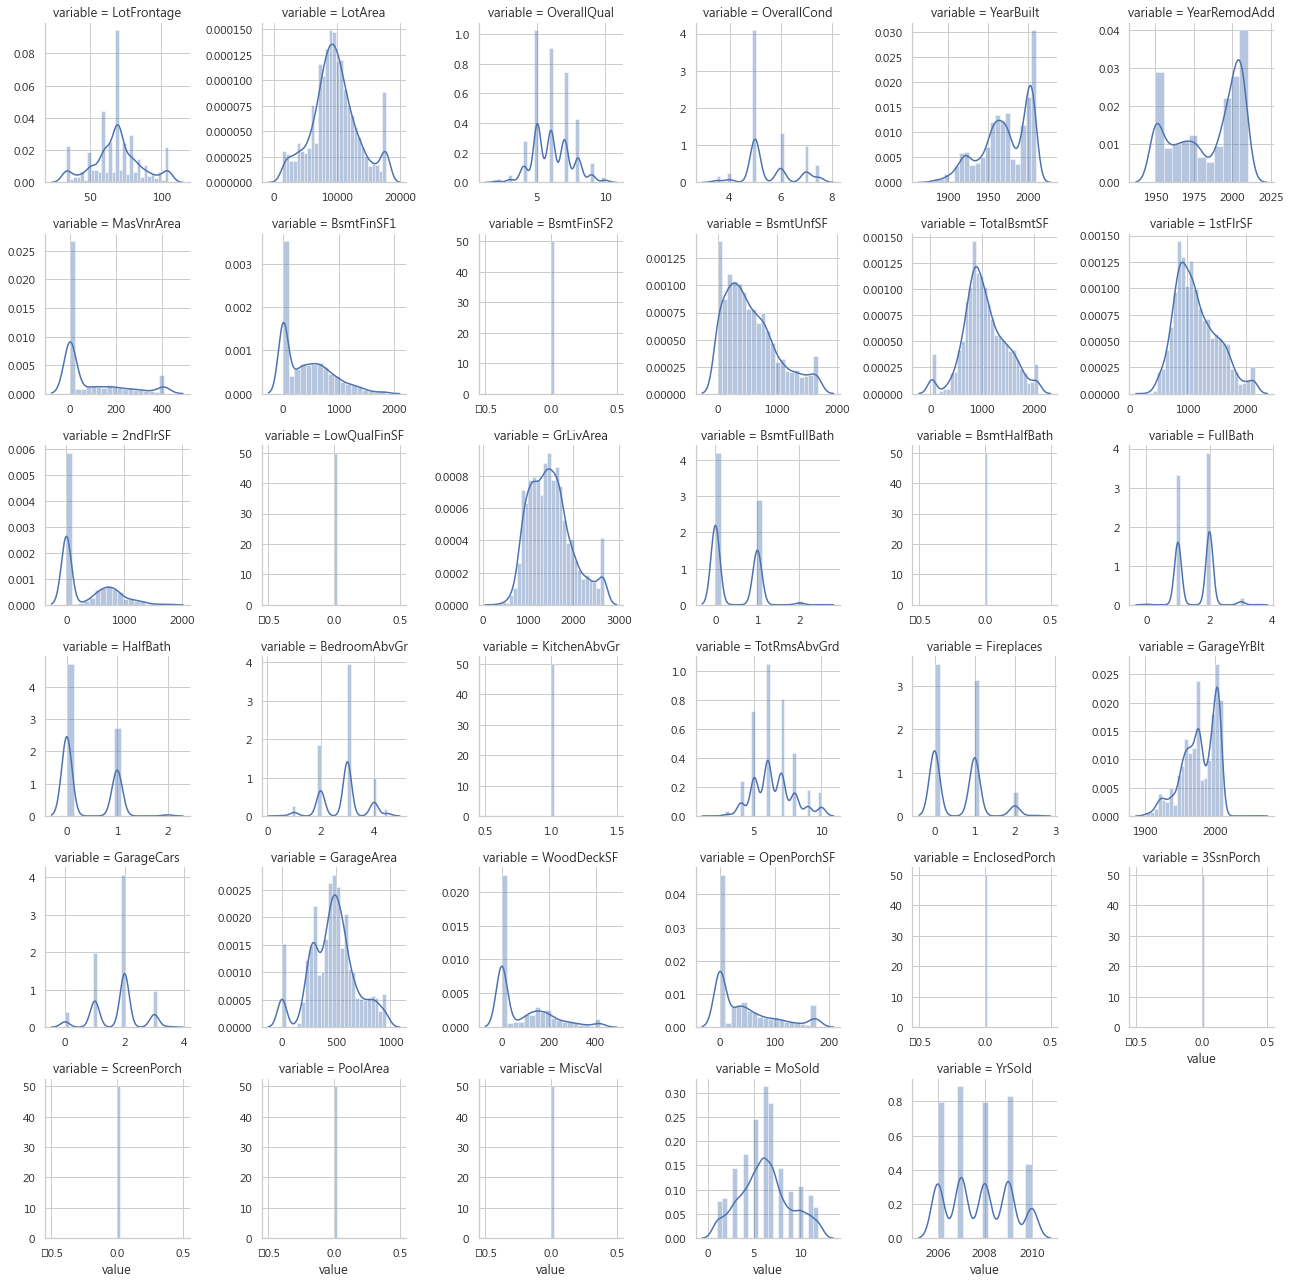

In [24]:
# 刪除警告訊息
import warnings
warnings.filterwarnings('ignore')

# 針對num_columns欄位評估數據分布狀況!!!
f = pd.melt(all_df, value_vars=num_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [25]:
all_df['TotalBsmtSF'] = all_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)  # 地下室總面積
all_df['GarageArea'] = all_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)     #  車庫面積（平方英尺）
all_df['2ndFlrSF'] = all_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)     # 二樓平方英尺
all_df['MasVnrArea'] = all_df['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)     # 砌體單板面積（平方英尺）
all_df['WoodDeckSF'] = all_df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)   # 以平方英尺為單位的木甲板面積
all_df['OpenPorchSF'] = all_df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)     # 以平方英尺為單位的開放門廊面積
all_df['PoolAreal'] = all_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)         # 以平方英尺為單位的泳池面積
all_df['YearBuilt'] = all_df['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)       # 原始建造日期

In [26]:
def log_transform(col):
    all_df[col] = np.log1p(all_df[col])

def quadratic(col):
    all_df[col] = (all_df[col])**2

log_list = ['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','LotArea','LotFrontage','KitchenAbvGr','GarageArea']

qdr_list = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','2ndFlrSF', 'Neighborhood', 'RoofMatl', 'GrLivArea']

for l in log_list:
    log_transform(l)

for qdr in qdr_list:
    quadratic(qdr)


In [27]:
# 轉換SalePrice位子
pr = all_df["SalePrice"]
all_df.drop(labels=['SalePrice'], axis=1,inplace = True)
all_df.insert(len(all_df.columns), "SalePrice", pr)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PoolAreal,SalePrice
0,1,5,3,4.189655,9.042040,1,3,3,0,4,...,0,0,0,0,2,2008,8,4,0,12.247699
1,2,0,3,4.394449,9.169623,1,3,3,0,2,...,0,0,0,0,5,2007,8,4,0,12.109016
2,3,5,3,4.234107,9.328212,1,0,3,0,4,...,0,0,0,0,9,2008,8,4,0,12.317171
3,4,6,3,4.110874,9.164401,1,0,3,0,0,...,0,0,0,0,2,2006,8,0,0,11.849405
4,5,5,3,4.442651,9.565284,1,0,3,0,2,...,0,0,0,0,12,2008,8,4,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,4,3.526361,7.568896,1,3,3,0,4,...,0,0,0,0,6,2006,8,4,0,NaN
1455,2916,13,4,3.526361,7.546974,1,3,3,0,4,...,0,0,0,0,4,2006,8,0,0,NaN
1456,2917,0,3,4.663439,9.781828,1,3,3,0,4,...,0,0,0,0,9,2006,8,0,0,NaN
1457,2918,9,3,4.143135,9.253591,1,3,3,0,4,...,0,0,0,0,7,2006,8,4,0,NaN


In [28]:
corr = all_df.corr()  ###顯示相關係數!!!
display(corr)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PoolAreal,SalePrice
Id,1.000000,0.011391,0.012932,-0.029615,-0.017542,0.002961,0.013354,-0.013996,-0.011314,0.033606,...,NaN,NaN,NaN,NaN,0.006448,-0.256050,-0.014113,0.006777,NaN,-0.017942
MSSubClass,0.011391,1.000000,0.031798,-0.435431,-0.485313,0.002709,0.065225,-0.009349,-0.018181,0.060984,...,NaN,NaN,NaN,NaN,0.009013,-0.014141,0.040083,-0.025609,NaN,-0.045223
MSZoning,0.012932,0.031798,1.000000,-0.117666,-0.091264,0.108450,0.096096,-0.032468,-0.000780,0.018972,...,NaN,NaN,NaN,NaN,-0.036290,-0.023439,0.050374,-0.022739,NaN,-0.188861
LotFrontage,-0.029615,-0.435431,-0.117666,1.000000,0.685940,-0.032259,-0.137345,-0.009401,0.002900,-0.160850,...,NaN,NaN,NaN,NaN,0.008811,0.001047,-0.027183,0.033694,NaN,0.353499
LotArea,-0.017542,-0.485313,-0.091264,0.685940,1.000000,-0.039660,-0.271897,-0.051183,0.019687,-0.175772,...,NaN,NaN,NaN,NaN,0.004823,-0.025841,-0.011815,0.024821,NaN,0.401251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YrSold,-0.256050,-0.014141,-0.023439,0.001047,-0.025841,-0.018273,0.029818,0.010016,0.016999,-0.005720,...,NaN,NaN,NaN,NaN,-0.153895,1.000000,0.013446,-0.016118,NaN,-0.037263
SaleType,-0.014113,0.040083,0.050374,-0.027183,-0.011815,0.013090,-0.012027,-0.028146,-0.087043,-0.007382,...,NaN,NaN,NaN,NaN,-0.034268,0.013446,1.000000,0.166519,NaN,-0.036747
SaleCondition,0.006777,-0.025609,-0.022739,0.033694,0.024821,0.016630,-0.075485,0.037970,-0.064893,0.034868,...,NaN,NaN,NaN,NaN,-0.000300,-0.016118,0.166519,1.000000,NaN,0.248819
PoolAreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

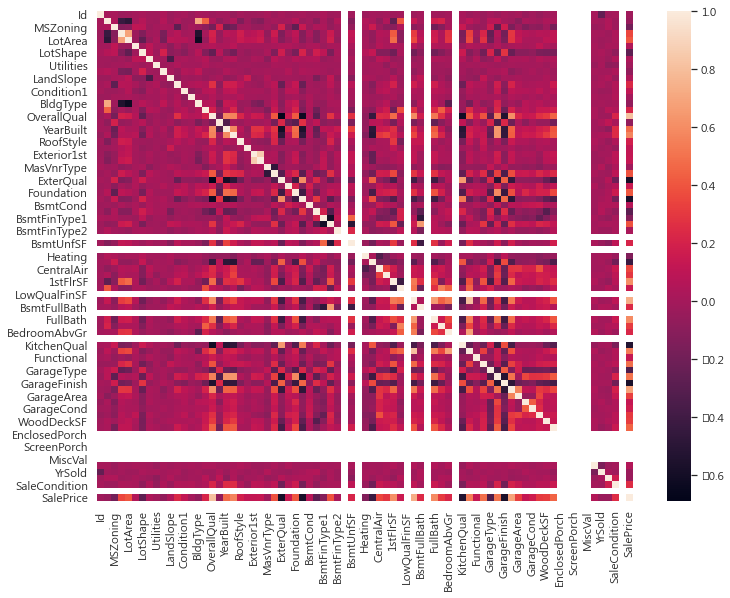

In [29]:
plt.figure(1,figsize=(12,9))  # 連續型變量相關圖
sns.heatmap(corr)

In [30]:
corr_drop = corr.iloc[-1,:] 
corr_drop

Id              -0.017942
MSSubClass      -0.045223
MSZoning        -0.188861
LotFrontage      0.353499
LotArea          0.401251
                   ...   
YrSold          -0.037263
SaleType        -0.036747
SaleCondition    0.248819
PoolAreal             NaN
SalePrice        1.000000
Name: SalePrice, Length: 77, dtype: float64

In [31]:
### | =>或者or...(此步驟在去除0.3~-0.3低度負相關的資料!!!)
new_col = [x for x in corr_drop[(corr_drop>0.03) | (corr_drop<-0.03)].index] 
print(len(new_col))
print(new_col)

61
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [32]:
new_df = pd.DataFrame()
new_df["Id"] = all_df["Id"]
for p1 in new_col:
    new_df[p1] = all_df[p1]

new_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,4.189655,9.042040,1,3,3,4,0,...,4,4,2,0,1,2,2008,8,4,12.247699
1,2,0,3,4.394449,9.169623,1,3,3,2,0,...,4,4,2,1,0,5,2007,8,4,12.109016
2,3,5,3,4.234107,9.328212,1,0,3,4,0,...,4,4,2,0,1,9,2008,8,4,12.317171
3,4,6,3,4.110874,9.164401,1,0,3,0,0,...,4,4,2,0,1,2,2006,8,0,11.849405
4,5,5,3,4.442651,9.565284,1,0,3,2,0,...,4,4,2,1,1,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,4,3.526361,7.568896,1,3,3,4,0,...,4,4,2,0,0,6,2006,8,4,NaN
1455,2916,13,4,3.526361,7.546974,1,3,3,4,0,...,4,4,2,0,1,4,2006,8,0,NaN
1456,2917,0,3,4.663439,9.781828,1,3,3,4,0,...,4,4,2,1,0,9,2006,8,0,NaN
1457,2918,9,3,4.143135,9.253591,1,3,3,4,0,...,4,4,2,1,1,7,2006,8,4,NaN


In [33]:
train_df.index[-1]


1459

In [34]:
new_df_train = new_df.iloc[train_df.index]
new_df_test = new_df.iloc[train_df.index[-1]+1:,:-1] # 需要另外再去除最後一個SalePrice欄位
new_df_train
new_df_test


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,4.189655,9.042040,1,3,3,4,0,...,4,4,2,0,1,2,2008,8,4,12.247699
1,2,0,3,4.394449,9.169623,1,3,3,2,0,...,4,4,2,1,0,5,2007,8,4,12.109016
2,3,5,3,4.234107,9.328212,1,0,3,4,0,...,4,4,2,0,1,9,2008,8,4,12.317171
3,4,6,3,4.110874,9.164401,1,0,3,0,0,...,4,4,2,0,1,2,2006,8,0,11.849405
4,5,5,3,4.442651,9.565284,1,0,3,2,0,...,4,4,2,1,1,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,3,4.143135,8.976894,1,3,3,4,0,...,4,4,2,0,1,8,2007,8,4,12.072547
1456,1457,0,3,4.454347,9.486152,1,3,3,4,0,...,4,4,2,1,0,2,2010,8,4,12.254868
1457,1458,6,3,4.204693,9.109746,1,3,3,4,0,...,4,4,2,0,1,5,2010,8,4,12.493133
1458,1459,0,3,4.234107,9.181735,1,3,3,4,0,...,4,4,2,1,0,4,2010,8,4,11.864469


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,4.394449,9.360741,1,3,3,4,0,...,0.693147,4,4,2,1,0,6,2010,8,4
1,1462,0,3,4.406719,9.565775,1,0,3,0,0,...,0.693147,4,4,2,1,1,6,2010,8,4
2,1463,5,3,4.317488,9.534668,1,0,3,4,0,...,0.693147,4,4,2,1,1,3,2010,8,4
3,1464,5,3,4.369448,9.208238,1,0,3,4,0,...,0.693147,4,4,2,1,1,6,2010,8,4
4,1465,11,3,3.784190,8.518392,1,0,1,4,0,...,0.693147,4,4,2,0,1,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,13,4,3.526361,7.568896,1,3,3,4,0,...,0.000000,4,4,2,0,0,6,2006,8,4
1455,2916,13,4,3.526361,7.546974,1,3,3,4,0,...,0.693147,4,4,2,0,1,4,2006,8,0
1456,2917,0,3,4.663439,9.781828,1,3,3,4,0,...,0.693147,4,4,2,1,0,9,2006,8,0
1457,2918,9,3,4.143135,9.253591,1,3,3,4,0,...,0.000000,4,4,2,1,1,7,2006,8,4


In [35]:
new_df_train.to_csv("./Data/output/train_ETL.csv", index=False)
new_df_test.to_csv("./Data/output/test_ETL.csv", index=False)